<a href="https://colab.research.google.com/github/ShirinNatania/Fundamental/blob/main/YBI02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mielage Prediction

Objective

To predict and analyze the mielage using Machine Learning Techniques.


Data Source

YBI Foundation

Import Library

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

Import Data

In [ ]:
path = 'https://github.com/YBI-Foundation/Dataset/raw/main/MPG.csv'
df=pd.read_csv(path)
print(df)

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin                       name  
0            70     usa  chevrolet chevelle malibu  
1            70     usa      

Describe Data

In [ ]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


Data Visualization

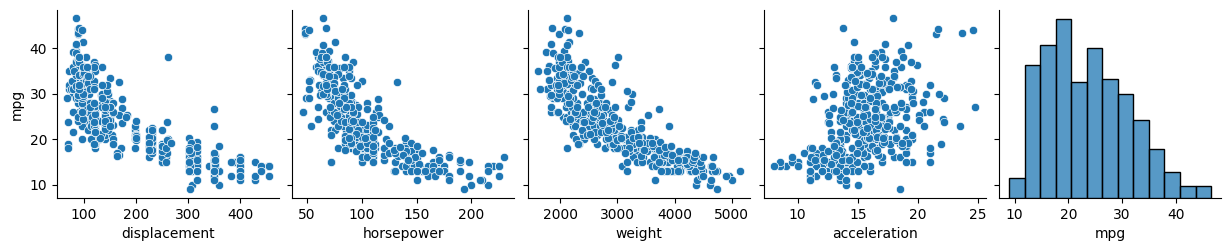

In [ ]:
sns.pairplot(df , x_vars = ['displacement','horsepower','weight','acceleration','mpg'], y_vars=['mpg']);

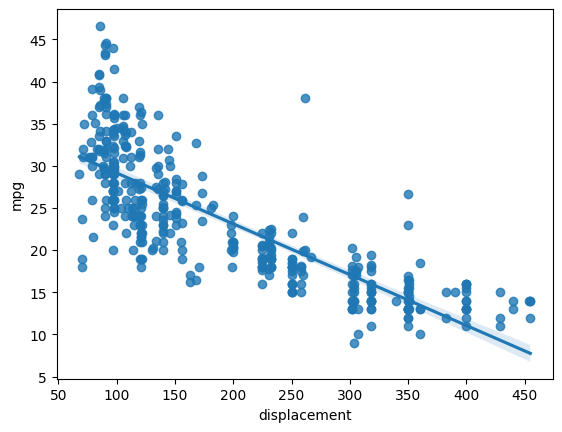

In [ ]:
sns.regplot(x = 'displacement', y ='mpg', data = df);

Data Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
df.corr()

<ipython-input-24-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


Define Target Variable (y) and Feature Variables (X)

In [ ]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [ ]:
y = df['mpg']
print(y)

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64


In [ ]:
y.shape

(398,)

In [ ]:
x=df[['displacement','horsepower','weight','acceleration']]
print(x)

     displacement  horsepower  weight  acceleration
0           307.0       130.0    3504          12.0
1           350.0       165.0    3693          11.5
2           318.0       150.0    3436          11.0
3           304.0       150.0    3433          12.0
4           302.0       140.0    3449          10.5
..            ...         ...     ...           ...
393         140.0        86.0    2790          15.6
394          97.0        52.0    2130          24.6
395         135.0        84.0    2295          11.6
396         120.0        79.0    2625          18.6
397         119.0        82.0    2720          19.4

[398 rows x 4 columns]


In [ ]:
x.shape

(398, 4)

Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
features = ['displacement']
target = ['weight']
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.25, random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((298, 1), (100, 1), (298, 1), (100, 1))

Modeling

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.intercept_

array([1515.41110228])

In [ ]:
model.coef_

array([[7.58902343]])

Model Evaluation

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
print(X_train_scaled)

[[-0.93324137]
 [-0.83481596]
 [ 0.06085531]
 [ 1.09432216]
 [ 0.56282492]
 [ 2.4329078 ]
 [-0.94308392]
 [ 1.54707907]
 [-0.86434358]
 [-1.06119441]
 [-1.19898999]
 [-0.8446585 ]
 [ 0.73014813]
 [-1.00213916]
 [-0.70686292]
 [-0.51985463]
 [-0.95292646]
 [ 0.31676139]
 [-1.00213916]
 [-0.29347618]
 [ 1.54707907]
 [-0.51985463]
 [ 0.07069785]
 [ 0.07069785]
 [ 0.06085531]
 [-0.24426347]
 [-1.00213916]
 [-0.41158668]
 [-0.93324137]
 [-0.71670546]
 [-1.02182425]
 [-1.0808795 ]
 [-1.06119441]
 [ 0.38565918]
 [-0.77576071]
 [ 0.56282492]
 [ 0.64156526]
 [-1.10056458]
 [-0.93324137]
 [-0.8446585 ]
 [ 0.56282492]
 [ 1.07463708]
 [ 1.55692161]
 [ 0.56282492]
 [ 0.38565918]
 [-1.06119441]
 [-0.94308392]
 [-1.20883253]
 [-0.69702038]
 [-0.726548  ]
 [ 2.57070338]
 [ 1.55692161]
 [-0.60843751]
 [-0.83481596]
 [ 1.87188294]
 [-0.94308392]
 [ 2.03920614]
 [-0.94308392]
 [ 0.31676139]
 [-0.94308392]
 [-0.51001209]
 [-0.24426347]
 [-0.94308392]
 [ 0.68093542]
 [ 1.23211774]
 [ 1.23211774]
 [ 0.31676

Prediction

In [ ]:
y_pred = model.predict(X_test)
print(y_pred)

[[2206.01223401]
 [2426.09391335]
 [3276.06453701]
 [3928.7205516 ]
 [3928.7205516 ]
 [2251.54637456]
 [2577.87438186]
 [4854.58140952]
 [3488.55719292]
 [3033.21578739]
 [4475.13023824]
 [2206.01223401]
 [2206.01223401]
 [3822.47422365]
 [2577.87438186]
 [4422.00707426]
 [2365.38172594]
 [2752.42192065]
 [4551.0204725 ]
 [2206.01223401]
 [2433.68293677]
 [3018.03774054]
 [3276.06453701]
 [2259.13539799]
 [3845.24129392]
 [2251.54637456]
 [2259.13539799]
 [2661.35363954]
 [3473.37914607]
 [4551.0204725 ]
 [2577.87438186]
 [2312.25856197]
 [4171.56930122]
 [2372.97074937]
 [2168.06711688]
 [4551.0204725 ]
 [2691.70973324]
 [3830.06324707]
 [3928.7205516 ]
 [2259.13539799]
 [2828.3121549 ]
 [2251.54637456]
 [2433.68293677]
 [4247.45953548]
 [2426.09391335]
 [2426.09391335]
 [2395.73781965]
 [2433.68293677]
 [2304.66953854]
 [2198.42321058]
 [2577.87438186]
 [2168.06711688]
 [2327.43660882]
 [4551.0204725 ]
 [2828.3121549 ]
 [4551.0204725 ]
 [4247.45953548]
 [2532.34024131]
 [2577.8743818

Explanation

Import the necessary library. Then import the dataset. Describe the data using the necessary function. 

Data visualization is the representation of data through use of common graphics, such as charts, plots, infographics, and even animations. 

Data preparation is the process of preparing raw data so that it is suitable for further processing and analysis. 

The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.

Data modeling is the process of creating a visual representation of either a whole information system or parts of it to communicate connections between data points and structures.

The data evaluation process determines whether data is usable for calculating risk estimates.